<a href="https://colab.research.google.com/github/neel26desai/cmpe255_assignment2/blob/main/Clustering_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [3]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

In [1]:
#We'll be performing Clustering on  iris data set (we wont be including target when clustering)

In [7]:
import numpy as np
import pandas as pd

In [8]:
#loading the iris data set
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
target = iris.target

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# we have 4 features and we know there are 4 types of species we want to cluster all the points belonging to a species together

In [12]:
#import ClusteringExperiment and initialize its class
from pycaret.clustering import ClusteringExperiment

In [14]:
exp=ClusteringExperiment()

In [15]:
#initialize a set up
exp.setup(data,session_id=321)

,Description,Value
0,Session id,321
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [21]:
exp.get_config('_ml_usecase')

<MLUsecase.CLUSTERING: 3>

In [23]:
#lets create a KMeans
kmeans_model = exp.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4981,530.7658,0.7803,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [26]:
kmeans_model

KMeans(n_clusters=4, random_state=321)

In [27]:
exp.plot_model(kmeans_model,'cluster')

In [28]:
#lets check the other available modesl
exp.models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [29]:
#lets train a dbscan and  birtch model
dbscan_model = exp.create_model('dbscan')
birch_model = exp.create_model('birch')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4860,220.2976,7.2225,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4840,461.9151,0.6550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# out of the 3 models birch_model is performing the best

In [34]:
exp.plot_model(birch_model,'cluster')

In [35]:
birch_cluster = exp.assign_model(birch_model) #assigns cluster labels to the training data, given a trained model, you can also use exp.predict_model() for the same task
birch_cluster

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,Cluster 2
1,4.9,3.0,1.4,0.2,Cluster 2
2,4.7,3.2,1.3,0.2,Cluster 2
3,4.6,3.1,1.5,0.2,Cluster 2
4,5.0,3.6,1.4,0.2,Cluster 2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Cluster 0
146,6.3,2.5,5.0,1.9,Cluster 0
147,6.5,3.0,5.2,2.0,Cluster 0
148,6.2,3.4,5.4,2.3,Cluster 0


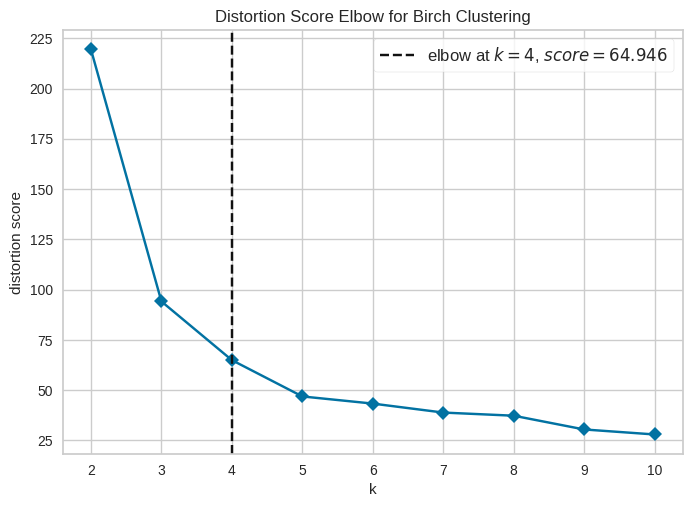

In [36]:
#plot elbow graph
exp.plot_model(birch_model, plot = 'elbow')

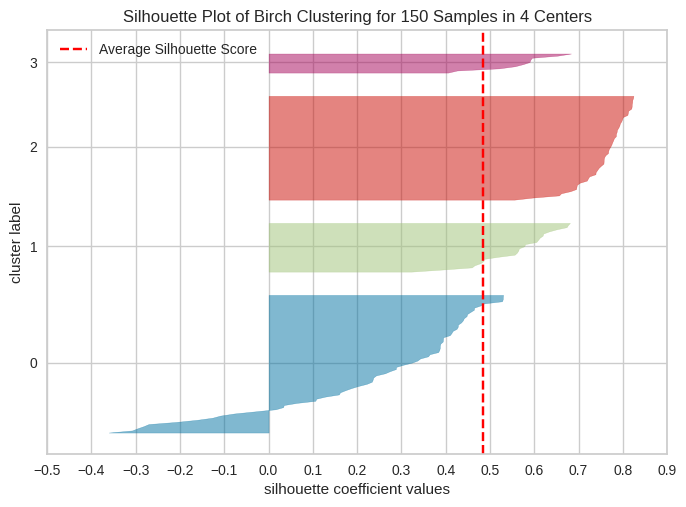

In [37]:
#plot the Silhoutte
exp.plot_model(birch_model, plot = 'silhouette')

In [38]:
exp.evaluate_model(birch_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [40]:
# save the birch pipeline
exp.save_model(birch_model, './kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['sepal length (cm)',
                                              'sepal width (cm)',
                                              'petal length (cm)',
                                              'petal width (cm)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', Birch(n_clusters=4))]),
 './kmeans_pipeline.pkl')

In [41]:
#reading the saved model to make assign clustering on the entire dataset
from pycaret.clustering import load_model,predict_model

In [42]:
model = load_model('./kmeans_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [43]:
model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['sepal length (cm)',
                                             'sepal width (cm)',
                                             'petal length (cm)',
                                             'petal width (cm)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', Birch(n_clusters=4))])

In [44]:
prediction = predict_model(model,data=data)

In [46]:
prediction

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,Cluster 2
1,4.9,3.0,1.4,0.2,Cluster 2
2,4.7,3.2,1.3,0.2,Cluster 2
3,4.6,3.1,1.5,0.2,Cluster 2
4,5.0,3.6,1.4,0.2,Cluster 2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Cluster 0
146,6.3,2.5,5.0,1.9,Cluster 0
147,6.5,3.0,5.2,2.0,Cluster 0
148,6.2,3.4,5.4,2.3,Cluster 0


Refrences:
[1] https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Clustering.ipynb